In [377]:
## Подключаем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
import pandas as pd
import yfinance as yf
import matplotlib
from pandas_datareader import data as pdr
from yahoo_fin.stock_info import get_data
import yahoo_fin.stock_info as si
from pandas_datareader import data as wb
import datetime
from nsepy import get_history
from nsepython import *
import logging
urllib3_logger = logging.getLogger('urllib3') # Обработчик сообщений, чтобы они не выводились при сборе данных о тикерах
urllib3_logger.setLevel(logging.CRITICAL)
logging.getLogger('matplotlib.font_manager').disabled = True

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [378]:
 # Задаем список тикеров. Здесь вручную.
list_of_tickers = si.tickers_sp500()
# Турция ["AGHOL.IS", "TURSG.IS", "AKBNK.IS", "AKCNS.IS", "AKSGY.IS", "AKSA.IS", "AKSEN.IS", "ALGYO.IS", "ALARK.IS", "ALBRK.IS", "ALCTL.IS", "ALKIM.IS", "AEFES.IS", "ARCLK.IS", "ARDYZ.IS", "ASELS.IS", "AYGAZ.IS", "BAGFS.IS", "BIMAS.IS", "BIZIM.IS", "BRSAN.IS", "BRISA.IS", "BUCIM.IS", "CLEBI.IS", "CEMTS.IS", "CIMSA.IS", "CCOLA.IS", "DEVA.IS", "DOHOL.IS", "DOAS.IS", "EGEEN.IS", "EKGYO.IS", "ENJSA.IS", "ENKAI.IS", "EREGL.IS", "FROTO.IS", "GARAN.IS", "GOODY.IS", "GOZDE.IS", "GSDHO.IS", "GUBRF.IS", "HALKB.IS", "HEKTS.IS", "INDES.IS", "IPEKE.IS", "ISFIN.IS", "ISGYO.IS", "ISMEN.IS", "ISDMR.IS", "KRDMD.IS", "KAREL.IS", "KARTN.IS", "KERVT.IS", "KCHOL.IS", "KORDS.IS", "KOZAL.IS", "KOZAA.IS", "LOGO.IS", "MAVI.IS", "MGROS.IS", "MPARK.IS", "NTHOL.IS", "NETAS.IS", "ODAS.IS", "OTKAR.IS", "OYAKC.IS", "OZKGY.IS", "PGSUS.IS", "PETKM.IS", "PETUN.IS", "PNSUT.IS", "SAHOL.IS", "SASA.IS", "SKBNK.IS", "SELEC.IS", "SISE.IS", "SOKM.IS", "TATGD.IS", "TAVHL.IS", "TKFEN.IS", "THYAO.IS", "TOASO.IS", "TRGYO.IS", "TSKB.IS", "TMSN.IS", "TUPRS.IS", "TTKOM.IS", "TTRAK.IS", "TKC", "THBIY", "ISCTR.IS", "TURSG.IS", "ULKER.IS", "VAKBN.IS", "VESTL.IS", "YKBNK.IS", "YATAS.IS", "ZOREN.IS"]
# Аргентина ["AGRO.BA", "ALUA.BA", "AUSO.BA", "BHIP.BA", "BMA.BA", "BPAT.BA", "BRIO.BA", "BBAR.BA", "GAMI.BA", "BOLT.BA", "BYMA.BA", "CVH.BA", "CGPA2.BA", "CAPX.BA", "CARC.BA", "CADO.BA", "CELU.BA", "CEPU2.BA", "URBA.BA", "COMO.BA", "INTR.BA", "CTIO.BA", "COUR.BA", "CRES.BA", "DGCU2.BA", "DOME.BA", "DYCA.BA", "EDSH.BA", "EDLH.BA", "EMAC.BA", "EDN.BA", "EMDE.BA", "DLAP.BA", "DSUR.BA", "CECO2.BA", "FERR.BA", "FIPL.BA", "REGE.BA", "GARO.BA", "GRIM.BA", "GCLA.BA", "OEST.BA", "GGAL.BA", "VALO.BA", "SUPV.BA", "HAVA.BA", "HARG.BA", "HULI.BA", "PATA.BA", "ROSE.BA", "INAG.BA", "IEBA.BA", "INVJ.BA", "IRSA.BA", "IRCP.BA", "RICH.BA", "LEDE.BA", "LEID.BA", "LOMA.BA", "LONG.BA", "MTBA.BA", "METR.BA", "MVIA.BA", "MIRG.BA", "MOLA.BA", "SEMI.BA", "MOLI.BA", "MORI.BA", "GBAN.BA", "NCON.BA", "OVOP.BA", "PAMP.BA", "PREN1.BA", "PATR.BA", "PSUR.BA", "PGR.BA", "POLL.BA", "RIGO.BA", "SAMI.BA", "COME.BA", "TECO2.BA", "TXAR.BA", "TGLT.BA", "TRAN.BA", "TGNO4.BA", "TGSU2.BA", "YPFD.BA"]
#si.tickers_sp500()
# Россия ["GAZP.ME", "SBER.ME", "LKOH.ME", "GMKN.ME", "YNDX.ME", "NVTK.ME", "ROSN.ME", "POLY.ME", "TCSG.ME", "PLZL.ME", "MGNT.ME", "NLMK.ME", "TATN.ME", "CHMF.ME", "SNGSP.ME", "MTSS.ME", "ALRS.ME", "SNGSP.ME", "FIVE.ME", "IMOEX.ME", "SBERP.ME", "IRAO.ME", "VTBR.ME", "PHOR.ME", "RUAL.ME", "PIKK.ME", "MAGN.ME", "AFKS.ME", "RTKM.ME", "TRNFP.ME", "DSKY.ME", "AFLT.ME", "HYDR.ME", "TATNP.ME", "FEES.ME", "CBOM.ME", "LSRG.ME", "RSTI.ME", "SIBN.ME"]
# si.tickers_sp500()
# Задаем диапазон дат в котором нужно собирать все данные по тикерам
start = datetime.datetime(2010,1,1)
end = datetime.datetime.today().date() # сегодняшняя дата, чтобы не менять вручную.
# Получаем данные из Yahoo. Именно этот способ позволяет получить данные с тикерами в столбцах.
yahoo_data = pdr.DataReader(list_of_tickers, 'yahoo', start, end)
stocks_price = pd.DataFrame(yahoo_data["Close"])
stocks_volume = pd.DataFrame(yahoo_data["Volume"])

In [580]:
stocks_price = pd.DataFrame(yahoo_data["Close"]).loc['2019':'2021'].fillna(0)
stocks_volume = pd.DataFrame(yahoo_data["Volume"]).loc['2019':'2021'].fillna(0)

In [581]:
stocks_volume

Symbols,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,2113300.0,5229500.0,1291000.0,148158800.0,6908400.0,1149700.0,590000.0,8737200.0,2059300.0,2784100.0,...,4476100.0,2478400.0,16727200.0,2899400.0,990900.0,1743400.0,1152100.0,347700.0,2234100.0,2665600.0
2019-01-03,5383900.0,16822000.0,1514700.0,365248800.0,7653200.0,1499400.0,665300.0,10570700.0,2801300.0,3663500.0,...,5287600.0,2666200.0,13866100.0,2382100.0,1243100.0,2680300.0,1166100.0,514600.0,2078400.0,2390900.0
2019-01-04,3123700.0,9369600.0,1423000.0,234428400.0,8910600.0,2417700.0,624300.0,8299100.0,2296400.0,4043400.0,...,5535600.0,3011700.0,16043600.0,2787800.0,970900.0,2142700.0,1580400.0,723300.0,2370500.0,3383500.0
2019-01-07,3235100.0,8010700.0,2088300.0,219111200.0,7281500.0,1608300.0,710600.0,9503000.0,2315600.0,3638500.0,...,4208100.0,2826100.0,10844200.0,2362800.0,1341600.0,2561100.0,900300.0,1100000.0,2459700.0,2360800.0
2019-01-08,1578100.0,7107700.0,1604700.0,164101200.0,7478300.0,1689500.0,570700.0,8905100.0,2647800.0,3685900.0,...,3128300.0,3172500.0,11439000.0,2277600.0,912800.0,2604700.0,3259000.0,838500.0,2819200.0,2250300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-15,1035800.0,19062200.0,1136300.0,62746300.0,3590500.0,474600.0,217400.0,5398800.0,1408200.0,2424800.0,...,2138300.0,902200.0,30717100.0,1145300.0,745600.0,1177700.0,1376800.0,184900.0,1032600.0,1629700.0
2021-06-16,1680800.0,20296900.0,823800.0,91815000.0,6670200.0,566200.0,287200.0,7051500.0,2350600.0,2842000.0,...,2550500.0,1015400.0,24803200.0,718800.0,1010300.0,1394400.0,1426100.0,196600.0,1620800.0,1933800.0
2021-06-17,2822400.0,32879100.0,1220700.0,96721700.0,4172300.0,597800.0,366300.0,5967400.0,1872100.0,3566400.0,...,2643100.0,2878900.0,28491800.0,933900.0,1074800.0,1215800.0,1367100.0,189400.0,1730800.0,1245500.0


In [582]:
# filtered_stocks = (stocks_price * stocks_volume
#                    ).mean().sort_values(ascending=False).index
# filtered_stocks
# filtered_stocks_prices = stocks_price[filtered_stocks]
# filtered_stocks_prices

# Filter the top 100 stocks
filtered_stocks = (stocks_price[:90] * stocks_volume[:90]
                   ).mean().sort_values(ascending=False).index[:100]

filtered_stocks_prices = stocks_price[filtered_stocks].dropna()

# Print columns of the filtered_stocks_prices dataframe
filtered_stocks

Index(['AMZN', 'AAPL', 'FB', 'NFLX', 'MSFT', 'TSLA', 'BA', 'NVDA', 'GOOGL',
       'AMD', 'BAC', 'GOOG', 'LLY', 'DIS', 'JPM', 'UNH', 'INTC', 'V', 'QCOM',
       'MU', 'WFC', 'CSCO', 'C', 'PFE', 'T', 'XOM', 'BMY', 'JNJ', 'CVX', 'GE',
       'MRK', 'DD', 'BKNG', 'PG', 'BRK-B', 'VZ', 'CRM', 'HD', 'MA', 'CVS',
       'AVGO', 'ADBE', 'CMCSA', 'PYPL', 'ORCL', 'KO', 'SBUX', 'WMT', 'EA',
       'UNP', 'GS', 'TWTR', 'MCD', 'CAT', 'TXN', 'PEP', 'MO', 'AMGN', 'IBM',
       'BIIB', 'NKE', 'ANTM', 'ABBV', 'MDT', 'MS', 'ATVI', 'CI', 'MMM', 'RTX',
       'GILD', 'XLNX', 'PM', 'HON', 'LOW', 'NOW', 'COP', 'ABT', 'COST', 'SLB',
       'TMO', 'OXY', 'FISV', 'EBAY', 'CMG', 'CHTR', 'STZ', 'WBA', 'LRCX',
       'ISRG', 'MPC', 'AMAT', 'NEM', 'KHC', 'F', 'DAL', 'EOG', 'NEE', 'AXP',
       'INTU', 'LMT'],
      dtype='object', name='Symbols')

Index(['CMG', 'AMD', 'LRCX', 'MU', 'AMAT', 'TWTR', 'CHTR', 'NOW', 'MA', 'LMT'], dtype='object', name='Symbols')
Index(['QCOM', 'AMD', 'LRCX', 'AAPL', 'AMAT', 'COST', 'NVDA', 'CHTR', 'ATVI',
       'T'],
      dtype='object', name='Symbols')
Index(['TSLA', 'AMD', 'LRCX', 'AAPL', 'AMAT', 'MU', 'BMY', 'NVDA', 'NEM',
       'FISV'],
      dtype='object', name='Symbols')
Index(['TSLA', 'NVDA', 'AMD', 'LRCX', 'AAPL', 'BIIB', 'ATVI', 'MU', 'CI',
       'AMAT'],
      dtype='object', name='Symbols')
Index(['TSLA', 'NVDA', 'AMD', 'NEM', 'NFLX', 'AAPL', 'NOW', 'BIIB', 'ATVI',
       'PYPL'],
      dtype='object', name='Symbols')
Index(['TSLA', 'NVDA', 'NFLX', 'NOW', 'AMD', 'PYPL', 'ADBE', 'AMZN', 'NEM',
       'EBAY'],
      dtype='object', name='Symbols')
Index(['TSLA', 'NVDA', 'AMD', 'PYPL', 'AMZN', 'AAPL', 'NOW', 'CRM', 'CMG',
       'NFLX'],
      dtype='object', name='Symbols')
Index(['TSLA', 'NVDA', 'PYPL', 'AMD', 'QCOM', 'NOW', 'AAPL', 'AMZN', 'TMO',
       'XLNX'],
      dtype='object', 

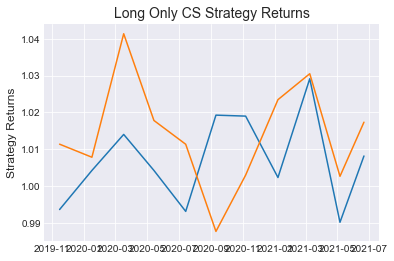

cumulative_return = 0.82%
cumulative_return2 = 1.74%
0.82%
1.74%


In [615]:
txn_cost = 0.001

lookback_days = 175
skip_days = 5
hold_days = 41

# print(filtered_stocks_prices)

cumulative_long_short = []
cumulative_long_only = []
cumulative_skip_recent_list = []
sell_buy_date = []
decile_coef = 0.06
txn_cost = 0.01
price = [] 
for i in range(100):
# i = 0
    try:
        lookback_returns = filtered_stocks_prices[i*hold_days:(i*hold_days)+lookback_days+1].pct_change()
        hold_returns = filtered_stocks_prices[(i*hold_days)+lookback_days+1+skip_days:(i*hold_days)+lookback_days+1+skip_days+hold_days].pct_change()      
        
        
    #     print(lookback_returns)
    #    print(hold_returns)

        lookback_returns_company_list = lookback_returns.mean().sort_values(ascending = False).dropna()
        lookback_returns_company_list_top = lookback_returns_company_list[:int(len(lookback_returns)*decile_coef)]
        lookback_returns_company_list_bottom = lookback_returns_company_list[::-1][:int(len(lookback_returns)*decile_coef)]

#         print(len(lookback_returns_company_list_top))
#         print(len(lookback_returns_company_list_bottom))      
        
        hold_list_top = hold_returns[lookback_returns_company_list_top.index.tolist()]
        hold_list_top_taxes = hold_list_top.copy()
        hold_list_top_taxes.iloc[1] = hold_list_top_taxes.iloc[1] * (1-len(hold_list_top)*txn_cost)
        hold_list_top_taxes.iloc[-1] = hold_list_top_taxes.iloc[-1] * (1-len(hold_list_top)*txn_cost)

        hold_list_bottom = hold_returns[lookback_returns_company_list_bottom.index.tolist()]
        hold_list_bottom_taxes = hold_list_bottom.copy()
        hold_list_bottom_taxes.iloc[1] = hold_list_bottom_taxes.iloc[1] * (1-len(hold_list_bottom)*txn_cost)
        hold_list_bottom_taxes.iloc[1] = hold_list_bottom_taxes.iloc[1] * (1-len(hold_list_bottom)*txn_cost)

    #     print(hold_list_top.index.tolist()[-1])
    #     print(hold_list_top )
#         cumulative_return_top = (hold_list_top_taxes.mean(axis=1)+1).cumprod().iloc[-1]
#         cumulative_return_bottom = (hold_list_bottom_taxes.mean(axis=1)+1).cumprod().iloc[-1]
        cumulative_portfel_long_short = (hold_list_top_taxes.mean(axis=1).iloc[-1] - hold_list_bottom_taxes.mean(axis=1).iloc[-1]+1).cumprod()
        cumulative_portfel_long_only = (hold_list_top_taxes.mean(axis=1).iloc[-1]+1).cumprod()
        cumulative_long_short.append(cumulative_portfel_long_short)
        cumulative_long_only.append(cumulative_portfel_long_only)
#        cumulative_skip_recent_list.append(cumulative_return_bottom)
        sell_buy_date.append(hold_list_top.index.tolist()[-1])
      #  print(hold_list_top_taxes.mean(axis=1).iloc[-1])
        print(hold_list_top.columns)
#         print('Sell/Buy Date: ', hold_list_top.index.tolist()[-1])
#         print('cumulative_long_only', cumulative_return_top)
#         print('cumulative_return_bottom', cumulative_return_bottom)

#         print('cumulative_skip_recent', cumulative_portfel)
    except:
        pass

final_df = pd.DataFrame()
final_df['Sell/Buy Date'] = sell_buy_date
final_df['Cumulative Long-Short'] = cumulative_long_short
final_df['Cumulative Long Only'] = cumulative_long_only
#final_df['Cumulative Skip Recent'] = cumulative_skip_recent_list
final_df


plt.plot(final_df['Sell/Buy Date'], final_df['Cumulative Long-Short'], final_df['Sell/Buy Date'], final_df['Cumulative Long Only'])
# plt.axis(final_df['Sell/Buy Date'])
plt.ylabel('Strategy Returns', fontsize=12)
plt.title('Long Only CS Strategy Returns', fontsize=14)
plt.show()

final_df = final_df.set_index('Sell/Buy Date')
#final_df.loc['2010':'2021'].sum()
print("cumulative_return =", "%.2f%%" % (100 * (final_df['Cumulative Long-Short'][-1] - 1)))
print("cumulative_return2 =", "%.2f%%" % (100 * (final_df['Cumulative Long Only'][-1] - 1)))
print( "%.2f%%" % (100 * (final_df['Cumulative Long-Short'][-1] - 1)))
print( "%.2f%%" % (100 * (final_df['Cumulative Long Only'][-1] - 1)))
# final_df

In [594]:
final_df.tail(40)

,Cumulative Long-Short,Cumulative Long Only
Sell/Buy Date,,
2019-11-15,[0.9915941368147809],[1.0064342497557013]
2020-01-16,[1.0016323882220892],[1.0069582798480448]
2020-03-17,[1.0011123319485382],[1.0401090093969907]
2020-05-14,[0.9935172444178599],[1.0131843917295322]
2020-07-14,[0.9943057696003859],[1.0101822771062927]
2020-09-10,[1.012225780842994],[0.9880296163986838]
2020-11-06,[1.0156592362903734],[1.0023588437192361]
2021-01-07,[1.0006316941090938],[1.0169759671055214]
2021-03-09,[1.018568052543534],[1.0188982152304304]


In [595]:
hold_returns = filtered_stocks_prices[(hold_days)+lookback_days+1+skip_days:(hold_days)+lookback_days+1+skip_days+hold_days+hold_days].pct_change().shift(-hold_days)

In [596]:
hold_returns

Symbols,AMZN,AAPL,FB,NFLX,MSFT,TSLA,BA,NVDA,GOOGL,AMD,...,AMAT,NEM,KHC,F,DAL,EOG,NEE,AXP,INTU,LMT
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-18,-0.007040,0.011071,0.001668,0.003101,0.005597,-0.005823,-0.023645,0.001406,0.020246,0.023307,...,-0.005695,-0.007759,-0.022061,-0.001091,0.002424,-0.019651,0.004479,0.007430,0.021599,-0.000094
2019-11-19,0.014630,-0.006777,-0.003151,-0.004593,-0.003591,0.071890,-0.033256,-0.005375,0.001845,0.002356,...,0.005569,0.005290,-0.000645,0.005459,-0.027245,-0.014887,0.013773,-0.007527,0.007637,0.001151
2019-11-20,-0.002400,0.003570,-0.000542,-0.035817,-0.004805,0.040863,-0.013945,0.008752,0.001093,0.007444,...,0.010918,0.001601,-0.010964,-0.005429,-0.011601,-0.011304,0.011717,0.007355,0.018491,-0.004060
2019-11-21,-0.001526,0.004816,-0.007049,0.072393,0.006156,0.004635,0.028447,0.010995,0.000553,0.005444,...,0.000000,-0.001827,0.000326,-0.002183,0.010563,-0.015164,0.000693,-0.000913,-0.005856,0.010273
2019-11-22,-0.012172,-0.002882,-0.008282,0.010183,-0.010077,-0.012898,0.016552,-0.009412,-0.012474,-0.026301,...,-0.029582,0.013501,-0.008801,-0.015317,-0.024224,-0.024197,0.013996,0.028469,-0.001733,0.008676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [597]:
s = filtered_stocks_prices.pct_change(hold_days).shift(-hold_days)

In [598]:
s

Symbols,AMZN,AAPL,FB,NFLX,MSFT,TSLA,BA,NVDA,GOOGL,AMD,...,AMAT,NEM,KHC,F,DAL,EOG,NEE,AXP,INTU,LMT
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,0.102032,0.113539,0.233564,0.311515,0.110166,-0.079840,0.336247,0.150932,0.093621,0.241105,...,0.167264,-0.000870,-0.233272,0.115190,-0.025953,0.068425,0.108403,0.139214,0.280403,0.150946
2019-01-03,0.128076,0.234475,0.299985,0.306416,0.146817,-0.079305,0.383467,0.222908,0.140150,0.378299,...,0.234306,0.003490,-0.237128,0.127249,0.090112,0.061465,0.111623,0.165043,0.310683,0.184749
2019-01-04,0.059388,0.177121,0.250526,0.208489,0.096341,-0.130473,0.297725,0.116455,0.080579,0.179474,...,0.129674,-0.036068,-0.261407,0.061881,0.040176,-0.021082,0.087173,0.116141,0.259745,0.144431
2019-01-07,-0.002185,0.166092,0.225136,0.118158,0.081619,-0.174260,0.287861,0.040865,0.069643,0.073408,...,0.095335,-0.022078,-0.296492,0.022919,0.036364,-0.033436,0.090840,0.098706,0.233378,0.130297
2019-01-08,-0.021599,0.146998,0.189925,0.091579,0.075000,-0.152706,0.240830,0.077308,0.059519,0.060723,...,0.146764,-0.010566,-0.292484,0.005974,0.044660,-0.095059,0.087357,0.094577,0.206714,0.115167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [599]:
hold_list_top_taxes

Symbols
Date
